In [21]:
from fabrictestbed_extensions.fablib.fablib import FablibManager as fablib_manager
fablib = fablib_manager() 
conf = fablib.show_config()

Orchestrator,orchestrator.fabric-testbed.net
Credential Manager,cm.fabric-testbed.net
Core API,uis.fabric-testbed.net
Token File,/home/fabric/.tokens.json
Project ID,6ce270de-788d-4e07-8bae-3206860a6387
Bastion Host,bastion.fabric-testbed.net
Bastion Username,addesilv_0000162511
Bastion Private Key File,/home/fabric/work/fabric_config/fabric_bastion_key
Slice Public Key File,/home/fabric/work/fabric_config/slice_key.pub
Slice Private Key File,/home/fabric/work/fabric_config/slice_key
Sites to avoid,


In [22]:
slice_name="project-test" + fablib.get_bastion_username()

node_conf = [

{'name': "Los-Angeles",   'cores': 1, 'ram': 1, 'disk': 1, 'image': 'default_ubuntu_20', 'packages': ['net-tools', 'iperf3', 'moreutils']}, 
{'name': "Seattle",  'cores': 1, 'ram': 1, 'disk': 1, 'image': 'default_ubuntu_20', 'packages': ['net-tools', 'iperf3', 'moreutils']}, 
{'name': "Chicago",   'cores': 1, 'ram': 1, 'disk': 1, 'image': 'default_ubuntu_20', 'packages': ['net-tools', 'iperf3', 'moreutils']}, 
{'name': "New-York",  'cores': 1, 'ram': 1, 'disk': 1, 'image': 'default_ubuntu_20', 'packages': ['net-tools', 'iperf3', 'moreutils']}, 
{'name': "Dallas",  'cores': 1, 'ram': 1, 'disk': 1, 'image': 'default_ubuntu_20', 'packages': ['net-tools', 'iperf3', 'moreutils']},
    
{'name': "Server-NY",  'cores': 1, 'ram': 1, 'disk': 1, 'image': 'default_ubuntu_20', 'packages': ['net-tools', 'iperf3', 'moreutils']},
{'name': "Client-Sea",  'cores': 1, 'ram': 1, 'disk': 1, 'image': 'default_ubuntu_20', 'packages': ['net-tools', 'iperf3', 'moreutils']},
    
]

net_conf = [

 {
    "name": "net_NY_to_Server", "subnet": "10.10.1.0/24", 
    "nodes": [{"name": "New-York",  "addr": "10.10.1.100"}, {"name": "Server-NY", "addr": "10.10.1.10"}]
 },
 {
    "name": "net_Sea_to_Client", "subnet": "10.10.2.0/24", 
    "nodes": [{"name": "Seattle", "addr": "10.10.2.100"}, {"name": "Client-Sea", "addr": "10.10.2.10"}]
 },
 {
    "name": "net_NY_to_Sea", "subnet": "10.10.3.0/24", 
    "nodes": [{"name": "New-York", "addr": "10.10.3.100"}, {"name": "Seattle", "addr": "10.10.3.10"}]
 },
 {
    "name": "net_NY_to_Dallas", "subnet": "10.10.4.0/24", 
    "nodes": [{"name": "New-York", "addr": "10.10.4.100"}, {"name": "Dallas", "addr": "10.10.4.10"}]
 },
 {
    "name": "net_Dallas_to_LA", "subnet": "10.10.5.0/24", 
    "nodes": [{"name": "Dallas", "addr": "10.10.5.100"}, {"name": "Los-Angeles", "addr": "10.10.5.10"}]
 },
 {
    "name": "net_LA_to_Sea", "subnet": "10.10.6.0/24", 
    "nodes": [{"name": "Los-Angeles", "addr": "10.10.6.100"}, {"name": "Seattle", "addr": "10.10.6.10"}]
 },
 {
    "name": "net_NY_to_Chi", "subnet": "10.10.7.0/24", 
    "nodes": [{"name": "New-York", "addr": "10.10.7.100"}, {"name": "Chicago", "addr": "10.10.7.10"}]
 },
 {
    "name": "net_Chi_to_Sea", "subnet": "10.10.8.0/24", 
    "nodes": [{"name": "Chicago", "addr": "10.10.8.100"}, {"name": "Seattle", "addr": "10.10.8.10"}]
 },
       
]
# # I'm not sure about this
# route_conf = [ 
#  {"addr": "10.10.2.0/24", "gw": "10.10.1.100", "nodes": ["Server-LA"]},
#  {"addr": "10.10.3.0/24", "gw": "10.10.1.100", "nodes": ["Server-LA"]},
    
#  {"addr": "10.10.2.0/24", "gw": "10.10.4.10", "nodes": ["Los-Angeles"]},
#  {"addr": "10.10.3.0/24", "gw": "10.10.5.10", "nodes": ["Los-Angeles"]},
    
#  {"addr": "10.10.1.0/24", "gw": "10.10.2.100", "nodes": ["Client-Sea"]},
#  {"addr": "10.10.3.0/24", "gw": "10.10.2.100", "nodes": ["Client-Sea"]},
    
#  {"addr": "10.10.3.0/24", "gw": "10.10.6.100", "nodes": ["Seattle"]},
#  {"addr": "10.10.1.0/24", "gw": "10.10.4.100", "nodes": ["Seattle"]},
    
         
#  {"addr": "10.10.1.0/24", "gw": "10.10.3.100", "nodes": ["Client-Denv"]},
#  {"addr": "10.10.2.0/24", "gw": "10.10.3.100", "nodes": ["Client-Denv"]},
    
#  {"addr": "10.10.1.0/24", "gw": "10.10.5.100", "nodes": ["Denver"]},
#  {"addr": "10.10.2.0/24", "gw": "10.10.6.10", "nodes": ["Denver"]},
    
#     #for 13 and above
# ]
exp_conf = {'cores': sum([ n['cores'] for n in node_conf]), 'nic': sum([len(n['nodes']) for n in net_conf]) }

In [23]:
try:
    slice = fablib.get_slice(slice_name)
    print(slice)
    print("You already have a slice by this name!")
    print("If you previously reserved resources, skip to the 'log in to resources' section.")
except:
    print("You don't have a slice named %s yet." % slice_name)
    print("Continue to the next step to make one.")
    slice = fablib.new_slice(name=slice_name)

You don't have a slice named project-testaddesilv_0000162511 yet.
Continue to the next step to make one.


In [24]:
while True:
    site_name = fablib.get_random_site(avoid=["DALL","GPN","LBNL","RENC","SALT","TACC","UKY","WASH","NCSA","LOSA","GATECH","INDI","MAX", "MASS","NEWY","SRI","UCSD"])

    
    if ( (fablib.resources.get_core_available(site_name) > 1.2 * exp_conf['cores']) and 
        (fablib.resources.get_component_available(site_name, 'SharedNIC-ConnectX-6') > 1.2 * exp_conf['nic']) ):
        break

# site_name = fablib.get_random_site(avoid=["DALL","GPN","LBNL","RENC","SALT","TACC","UKY","WASH","NCSA","LOSA","GATECH","INDI","MAX", "MASS","NEWY","SRI","UCSD"])

fablib.show_site(site_name)

# fablib.get_random_sites(count=1, 
#        avoid=["DALL","GPN","LBNL","RENC","SALT","TACC","UKY","WASH","NCSA","LOSA","GATECH","INDI","MAX", "MASS","NEWY","SRI","UCSD"])

Name,TOKY
State,Active
Address,"7-3-1 Hongo,Bunkyo-ku,Tokyo,Japan"
Location,"(35.71881, 139.744732)"
PTP Capable,True
Hosts,3
CPUs,6
Cores Available,41
Cores Capacity,384
Cores Allocated,343
RAM Available,715


'<pandas.io.formats.style.Styler object at 0x7f31f61eeb00>'

In [25]:
# this cell sets up the nodes
for n in node_conf:
    node = slice.add_node(name=n['name'], site=site_name, 
                   cores=n['cores'], 
                   ram=n['ram'], 
                   disk=n['disk'], 
                   image=n['image'])
    node.add_fabnet()

In [26]:
# this cell sets up the network segments
for n in net_conf:
    ifaces = [slice.get_node(node["name"]).add_component(model="NIC_Basic", 
                                                 name=n["name"]).get_interfaces()[0] for node in n['nodes'] ]
    slice.add_l2network(name=n["name"], type='L2Bridge', interfaces=ifaces)

In [27]:
slice.submit()


Retry: 13, Time: 1283 sec


ID,ac8ac613-b0d8-40b9-8c0e-c7edd57c72da
Name,project-testaddesilv_0000162511
Lease Expiration (UTC),2024-05-03 07:36:38 +0000
Lease Start (UTC),2024-05-02 07:36:40 +0000
Project ID,6ce270de-788d-4e07-8bae-3206860a6387
State,StableOK


ID,Name,Cores,RAM,Disk,Image,Image Type,Host,Site,Username,Management IP,State,Error,SSH Command,Public SSH Key File,Private SSH Key File
a214997a-1b26-4275-9b0b-5e323eba614c,Chicago,1,2,10,default_ubuntu_20,qcow2,toky-w1.fabric-testbed.net,TOKY,ubuntu,133.69.160.244,Active,,ssh -i /home/fabric/work/fabric_config/slice_key -F /home/fabric/work/fabric_config/ssh_config ubuntu@133.69.160.244,/home/fabric/work/fabric_config/slice_key.pub,/home/fabric/work/fabric_config/slice_key
748802eb-1a04-478e-b896-3262f8eeeb65,Client-Sea,1,2,10,default_ubuntu_20,qcow2,toky-w1.fabric-testbed.net,TOKY,ubuntu,133.69.160.98,Active,,ssh -i /home/fabric/work/fabric_config/slice_key -F /home/fabric/work/fabric_config/ssh_config ubuntu@133.69.160.98,/home/fabric/work/fabric_config/slice_key.pub,/home/fabric/work/fabric_config/slice_key
52f8ee77-b77a-450e-9937-5a75fa0f6402,Dallas,1,2,10,default_ubuntu_20,qcow2,toky-w1.fabric-testbed.net,TOKY,ubuntu,133.69.160.53,Active,,ssh -i /home/fabric/work/fabric_config/slice_key -F /home/fabric/work/fabric_config/ssh_config ubuntu@133.69.160.53,/home/fabric/work/fabric_config/slice_key.pub,/home/fabric/work/fabric_config/slice_key
b5dc122e-b3b1-4a13-b2a3-6cdb8404d909,Los-Angeles,1,2,10,default_ubuntu_20,qcow2,toky-w3.fabric-testbed.net,TOKY,ubuntu,133.69.160.17,Active,,ssh -i /home/fabric/work/fabric_config/slice_key -F /home/fabric/work/fabric_config/ssh_config ubuntu@133.69.160.17,/home/fabric/work/fabric_config/slice_key.pub,/home/fabric/work/fabric_config/slice_key
11eb9039-7733-4118-a359-abcfeb10aa86,New-York,1,2,10,default_ubuntu_20,qcow2,toky-w1.fabric-testbed.net,TOKY,ubuntu,133.69.160.129,Active,,ssh -i /home/fabric/work/fabric_config/slice_key -F /home/fabric/work/fabric_config/ssh_config ubuntu@133.69.160.129,/home/fabric/work/fabric_config/slice_key.pub,/home/fabric/work/fabric_config/slice_key
a6debda2-6035-4d03-83af-fe1a9210514c,Seattle,1,2,10,default_ubuntu_20,qcow2,toky-w3.fabric-testbed.net,TOKY,ubuntu,133.69.160.78,Active,,ssh -i /home/fabric/work/fabric_config/slice_key -F /home/fabric/work/fabric_config/ssh_config ubuntu@133.69.160.78,/home/fabric/work/fabric_config/slice_key.pub,/home/fabric/work/fabric_config/slice_key
a51599e9-f424-409a-b76d-dd11ba073e70,Server-NY,1,2,10,default_ubuntu_20,qcow2,toky-w1.fabric-testbed.net,TOKY,ubuntu,133.69.160.60,Active,,ssh -i /home/fabric/work/fabric_config/slice_key -F /home/fabric/work/fabric_config/ssh_config ubuntu@133.69.160.60,/home/fabric/work/fabric_config/slice_key.pub,/home/fabric/work/fabric_config/slice_key


ID,Name,Layer,Type,Site,Subnet,Gateway,State,Error
4aa3eca9-8d56-4c56-a4c9-fd692ccc32f0,FABNET_IPv4_TOKY,L3,FABNetv4,TOKY,10.146.4.0/24,10.146.4.1,Active,
85fb7078-6ee6-477e-aacc-44bf9fca40c9,net_Chi_to_Sea,L2,L2Bridge,TOKY,None,None,Active,
3bbd5f86-fa48-4740-9570-455e195397fa,net_Dallas_to_LA,L2,L2Bridge,TOKY,None,None,Active,
aceb300d-5b62-4fb0-8450-f6b520fc91b6,net_LA_to_Sea,L2,L2Bridge,TOKY,None,None,Active,
fa843090-7fc7-43e7-8086-8014ce0a5f29,net_NY_to_Chi,L2,L2Bridge,TOKY,None,None,Active,
339a3f6a-80fb-4b2d-8b25-69076d23ef9c,net_NY_to_Dallas,L2,L2Bridge,TOKY,None,None,Active,
5ad8221a-bf4c-4e79-8245-a9698436f042,net_NY_to_Sea,L2,L2Bridge,TOKY,None,None,Active,
2322eec7-fa71-4d5a-9efa-19de7c29ef7a,net_NY_to_Server,L2,L2Bridge,TOKY,None,None,Active,
cdb24fcb-005d-4812-bd04-1ba63146d612,net_Sea_to_Client,L2,L2Bridge,TOKY,None,None,Active,


Name,Short Name,Node,Network,Bandwidth,Mode,VLAN,MAC,Physical Device,Device,IP Address,Numa Node
Los-Angeles-FABNET_IPv4_TOKY_nic-p1,p1,Los-Angeles,FABNET_IPv4_TOKY,100,auto,,1E:52:E4:19:8C:99,enp8s0,enp8s0,10.146.4.2,4
Los-Angeles-net_LA_to_Sea-p1,p1,Los-Angeles,net_LA_to_Sea,100,config,,02:2D:08:2E:E2:8E,enp7s0,enp7s0,None,4
Los-Angeles-net_Dallas_to_LA-p1,p1,Los-Angeles,net_Dallas_to_LA,100,config,,2E:C8:C8:BA:94:15,enp9s0,enp9s0,None,4
Seattle-net_LA_to_Sea-p1,p1,Seattle,net_LA_to_Sea,100,config,,32:47:DB:A5:C0:03,enp7s0,enp7s0,None,4
Seattle-net_Sea_to_Client-p1,p1,Seattle,net_Sea_to_Client,100,config,,32:76:0A:24:DB:BF,enp8s0,enp8s0,None,4
Seattle-FABNET_IPv4_TOKY_nic-p1,p1,Seattle,FABNET_IPv4_TOKY,100,auto,,36:51:ED:1E:D0:4E,enp10s0,enp10s0,10.146.4.8,4
Seattle-net_Chi_to_Sea-p1,p1,Seattle,net_Chi_to_Sea,100,config,,36:D5:B1:68:BF:53,enp11s0,enp11s0,None,4
Seattle-net_NY_to_Sea-p1,p1,Seattle,net_NY_to_Sea,100,config,,36:17:CC:8F:5C:6E,enp9s0,enp9s0,None,4
Chicago-FABNET_IPv4_TOKY_nic-p1,p1,Chicago,FABNET_IPv4_TOKY,100,auto,,46:36:B6:F8:C7:2B,enp7s0,enp7s0,10.146.4.7,6
Chicago-net_NY_to_Chi-p1,p1,Chicago,net_NY_to_Chi,100,config,,4A:F3:E3:13:5F:04,enp9s0,enp9s0,None,6



Time to print interfaces 1324 seconds


'ac8ac613-b0d8-40b9-8c0e-c7edd57c72da'

In [28]:
slice.get_state()
slice.wait_ssh(progress=True)

Waiting for slice . Slice state: StableOK
Waiting for ssh in slice . ssh successful


True

In [29]:
slice = fablib.get_slice(name=slice_name)

In [30]:
# install packages
# this will take a while and will run in background while you do other steps
for n in node_conf:
    if len(n['packages']):
        node = slice.get_node(n['name'])
        pkg = " ".join(n['packages'])
        node.execute_thread("sudo apt update; sudo apt -y install %s" % pkg)

In [31]:
# bring interfaces up and either assign an address (if there is one) or flush address
from ipaddress import ip_address, IPv4Address, IPv4Network

for net in net_conf:
    for n in net['nodes']:
        if_name = n['name'] + '-' + net['name'] + '-p1'
        iface = slice.get_interface(if_name)
        iface.ip_link_up()
        if n['addr']:
            iface.ip_addr_add(addr=n['addr'], subnet=IPv4Network(net['subnet']))
        else:
            iface.get_node().execute("sudo ip addr flush dev %s"  % iface.get_device_name())

In [32]:
# enable IPv4 forwarding on all nodes
for n in slice.get_nodes():
    n.execute("sudo sysctl -w net.ipv4.ip_forward=1")

net.ipv4.ip_forward = 1
net.ipv4.ip_forward = 1
net.ipv4.ip_forward = 1
net.ipv4.ip_forward = 1
net.ipv4.ip_forward = 1
net.ipv4.ip_forward = 1
net.ipv4.ip_forward = 1


In [17]:
# set up static routes
for rt in route_conf:
    for n in rt['nodes']:
        slice.get_node(name=n).ip_route_add(subnet=IPv4Network(rt['addr']), gateway=rt['gw'])

NameError: name 'route_conf' is not defined

In [33]:
for n in node_conf:
    node = slice.get_node(n['name'])
    print(node.get_name())
    print(node.get_ip_routes())
    print('=========================')

Los-Angeles
[{'dst': 'default', 'gateway': '10.20.4.1', 'dev': 'enp3s0', 'protocol': 'dhcp', 'prefsrc': '10.20.4.81', 'metric': 100, 'flags': []}, {'dst': '10.10.5.0/24', 'dev': 'enp9s0', 'protocol': 'kernel', 'scope': 'link', 'prefsrc': '10.10.5.10', 'flags': []}, {'dst': '10.10.6.0/24', 'dev': 'enp7s0', 'protocol': 'kernel', 'scope': 'link', 'prefsrc': '10.10.6.100', 'flags': []}, {'dst': '10.20.4.0/23', 'dev': 'enp3s0', 'protocol': 'kernel', 'scope': 'link', 'prefsrc': '10.20.4.81', 'flags': []}, {'dst': '10.128.0.0/10', 'gateway': '10.146.4.1', 'dev': 'enp8s0', 'flags': []}, {'dst': '10.146.4.0/24', 'dev': 'enp8s0', 'protocol': 'kernel', 'scope': 'link', 'prefsrc': '10.146.4.2', 'flags': []}, {'dst': '169.254.169.254', 'gateway': '10.20.4.1', 'dev': 'enp3s0', 'protocol': 'dhcp', 'prefsrc': '10.20.4.81', 'metric': 100, 'flags': []}]
Seattle
[{'dst': 'default', 'gateway': '10.20.4.1', 'dev': 'enp3s0', 'protocol': 'dhcp', 'prefsrc': '10.20.4.212', 'metric': 100, 'flags': []}, {'dst': 

In [34]:
l2_nets = [(n.get_name(), {'color': 'lavender'}) for n in slice.get_l2networks() ]
l3_nets = [(n.get_name(), {'color': 'pink'}) for n in slice.get_l3networks() ]
hosts   =   [(n.get_name(), {'color': 'lightblue'}) for n in slice.get_nodes()]
nodes = l2_nets + l3_nets + hosts
ifaces = [iface.toDict() for iface in slice.get_interfaces()]
edges = [(iface['network'], iface['node'], 
          {'label': iface['physical_dev'] + '\n' + iface['ip_addr'] + '\n' + iface['mac']}) for iface in ifaces]

In [35]:
for n in nodes:
    if 'Client' in n[0] or 'Server' in n[0]:
        if 'net' in n[0]:
            pass
        else:
            n[1]['color'] = 'salmon'
    elif not 'net' in n[0]:
        n[1]['color'] = 'lightblue'

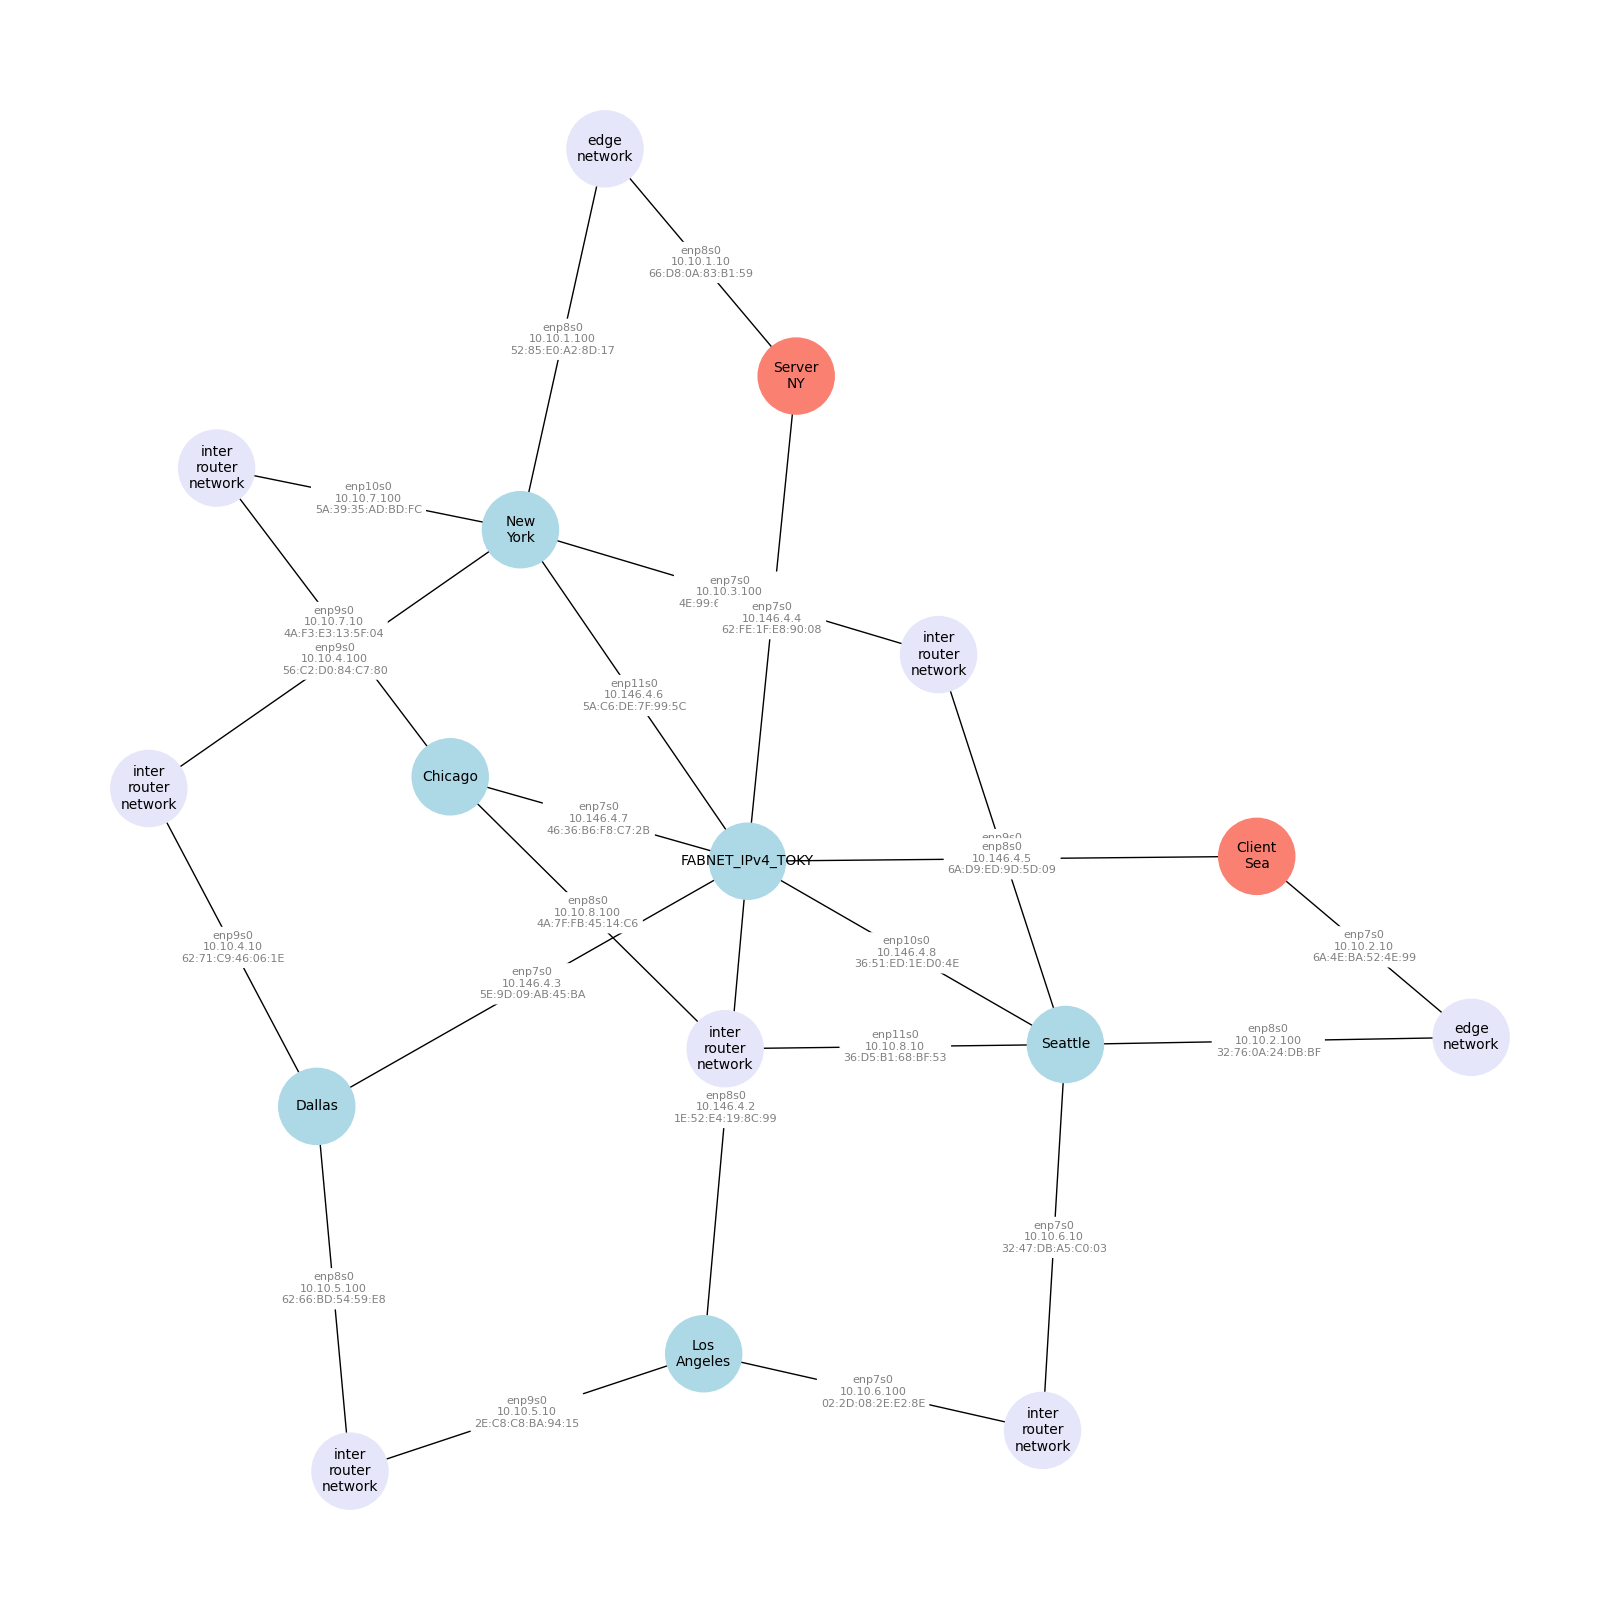

In [36]:
import networkx as nx
import matplotlib.pyplot as plt
plt.figure(figsize=(len(nodes),len(nodes)))
G = nx.Graph()
G.add_nodes_from(nodes)
G.add_edges_from(edges)
pos = nx.spring_layout(G)
nx.draw(G, pos, node_shape='o',  
        node_color=[n[1]['color'] for n in nodes], 
        # node_size=[len(n[0])*400 for n in nodes], 
        node_size=3000,
        with_labels=False);
nx.draw_networkx_edge_labels(G,pos,
                             edge_labels=nx.get_edge_attributes(G,'label'),
                             font_color='gray',  font_size=8, rotate=False);
from matplotlib.pyplot import figure, text
for node, (x, y) in pos.items():
    if 'net' in node:
        if 'Client' in node or 'Server' in node:
            label = 'edge\nnetwork'
        else:
            label = 'inter\nrouter\nnetwork'
    else:
        label = node.replace('-', '\n')
    text(x, y, label, fontsize=10, ha='center', va='center')

In [20]:
try:
    slice = fablib.get_slice(name=slice_name)
    slice.delete()
except Exception as e:
    print(f"Exception: {e}")

Exception: Unable to find slice "project-testaddesilv_0000162511" for this project. Check slice name spelling and project id.


# SSH To Run Bitrate Experiment

In [11]:
for n in slice.get_nodes():
    print(n.get_name())

Los-Angeles
Seattle
Chicago
New-York
Dallas
Server-NY
Client-Sea


In [40]:
node1 = slice.get_node(name='Server-NY')   
node3 = slice.get_node(name='Los-Angeles')

node3_addr = node3.get_interface(network_name=f'FABNET_IPv4_{node3.get_site()}').get_ip_addr()
    
node1.execute('hostname')
stdout, stderr = node1.execute(f'ping -c 50 {node3_addr}')  

Server-NY
PING 10.146.4.2 (10.146.4.2) 56(84) bytes of data.
64 bytes from 10.146.4.2: icmp_seq=1 ttl=64 time=0.140 ms
64 bytes from 10.146.4.2: icmp_seq=2 ttl=64 time=0.078 ms
64 bytes from 10.146.4.2: icmp_seq=3 ttl=64 time=0.061 ms
64 bytes from 10.146.4.2: icmp_seq=4 ttl=64 time=0.078 ms
64 bytes from 10.146.4.2: icmp_seq=5 ttl=64 time=0.065 ms
64 bytes from 10.146.4.2: icmp_seq=6 ttl=64 time=0.062 ms
64 bytes from 10.146.4.2: icmp_seq=7 ttl=64 time=0.075 ms
64 bytes from 10.146.4.2: icmp_seq=8 ttl=64 time=0.072 ms
64 bytes from 10.146.4.2: icmp_seq=9 ttl=64 time=0.073 ms
64 bytes from 10.146.4.2: icmp_seq=10 ttl=64 time=0.066 ms
64 bytes from 10.146.4.2: icmp_seq=11 ttl=64 time=0.071 ms
64 bytes from 10.146.4.2: icmp_seq=12 ttl=64 time=0.067 ms
64 bytes from 10.146.4.2: icmp_seq=13 ttl=64 time=0.067 ms
64 bytes from 10.146.4.2: icmp_seq=14 ttl=64 time=0.071 ms
64 bytes from 10.146.4.2: icmp_seq=15 ttl=64 time=0.066 ms
64 bytes from 10.146.4.2: icmp_seq=16 ttl=64 time=0.068 ms
64 b

In [15]:
node1 = slice.get_node(name='Los-Angeles')   
node3 = slice.get_node(name='Seattle')

node3_addr = node3.get_interface(network_name=f'FABNET_IPv4_{node3.get_site()}').get_ip_addr()
    
node1.execute('hostname')
stdout, stderr = node1.execute(f'ping -c 5 {node3_addr}')  

Los-Angeles
 ping: None: Temporary failure in name resolution
 